In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
df = pd.read_excel("F:\Cardiology.xls", sheetname = 0, skiprows=[1,2])
df.head()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [14]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.describe()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,3.155116,131.623762,246.264026,0.148515,0.983498,149.646865,0.326733,1.039604,1.600660,0.666667,4.735974,0.544554
std,9.082101,0.466011,0.958941,17.538143,51.830751,0.356198,0.994883,22.905161,0.469794,1.161075,0.616226,0.933790,1.940231,0.498835
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
df.shape

(303, 14)

In [27]:
#1. How does blood pressure and cholesterol relate to each other?

In [16]:
blood_pressure = df['blood pressure']

In [18]:
cholesterol = df['cholesterol']

In [20]:
blood_pressure.corr(cholesterol)

0.12317420653239071

In [22]:
#The correlation between blood pressure and cholesterol is low

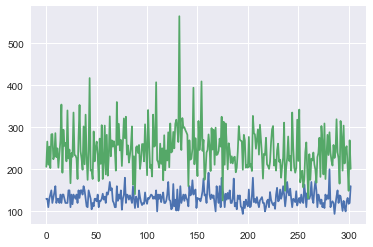

In [26]:
plt.plot(blood_pressure)
plt.plot(cholesterol)

In [31]:
#2.1 Do men tend to have higher blood pressure than women?
#Null hypotheses: Men have no higher blood pressure than women
#Alternative hypotheses: Men have higher blood pressure than women

In [39]:
blood_pressure_male = df[df.sex == 1]['blood pressure']
blood_pressure_female = df[df.sex == 0]['blood pressure']

In [38]:
ttest_ind(blood_pressure_male, blood_pressure_female)

Ttest_indResult(statistic=-0.98649315362083601, pvalue=0.3246834797221041)

In [42]:
#pvalue=0.3246834797221041 > 0.1
#There is no evidence that men have higher blood pressure than women

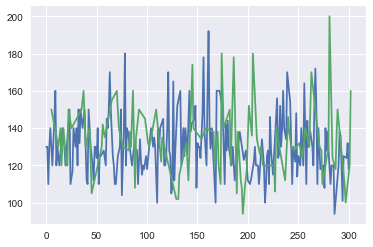

In [43]:
plt.plot(blood_pressure_male)
plt.plot(blood_pressure_female)

In [45]:
#2.2 Do men tend to have higher cholesterol than women?
#Null hypotheses: Men have no higher cholesterol than women
#Alternative hypotheses: Men have higher cholesterol than women

In [47]:
cholesterol_male = df[df.sex == 1]['cholesterol']
cholesterol_female = df[df.sex == 0]['cholesterol']

In [49]:
ttest_ind(cholesterol_male, cholesterol_female)

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.00052996661062266396)

In [51]:
#pvalue=0.00052996661062266396 < 0.01
#Demonstrate that men have higher cholesterol than women

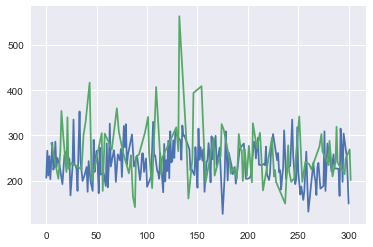

In [53]:
plt.plot(cholesterol_male)
plt.plot(cholesterol_female)

In [55]:
#3. What contribute to causing heart disease (age, cholesterol, blood pressure)?
#Is it the effect the same for both sex (male and female)?
#3.1.1
#Null hypotheses: In men, the age does not cause heart disease
#Alternative hypotheses: In men, the age causes heart disease

In [60]:
age_men_heartdisease = df['age'][df['sex']==1][df['class']== 1]
age_men_no_heartdisease = df['age'][df['sex']==1][df['class']== 0]

In [64]:
ttest_ind(age_men_heartdisease, age_men_no_heartdisease)

Ttest_indResult(statistic=-4.3548405497566245, pvalue=2.1024425773077122e-05)

In [74]:
#pvalue=2.1024425773077122e-05 < 0.05
#In men, the age causes heart disease

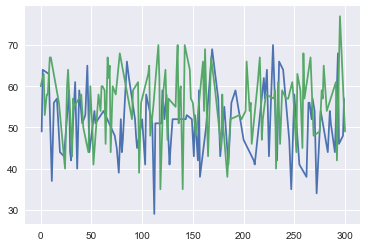

In [75]:
plt.plot(age_men_heartdisease)
plt.plot(age_men_no_heartdisease)

In [76]:
#3.1.2
#Null hypotheses: In men, the cholesterol does not cause heart disease
#Alternative hypotheses: In men, the cholesterol causes heart disease

In [78]:
cholesterol_men_heartdisease = df['cholesterol'][df['sex']==1][df['class']== 1]
cholesterol_men_no_heartdisease = df['cholesterol'][df['sex']==1][df['class']== 0]

In [80]:
ttest_ind(cholesterol_men_heartdisease, cholesterol_men_no_heartdisease)

Ttest_indResult(statistic=-2.554869457866797, pvalue=0.011348054524752035)

In [82]:
#pvalue=0.011348054524752035 < 0.05
#In men, the cholesterol causes heart disease

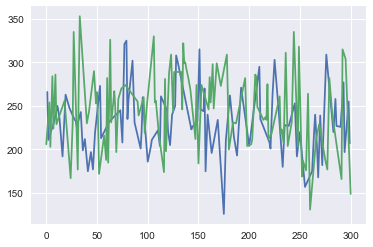

In [84]:
plt.plot(cholesterol_men_heartdisease)
plt.plot(cholesterol_men_no_heartdisease)

In [85]:
#3.1.3
#Null hypotheses: In men, the blood pressure does not cause heart disease
#Alternative hypotheses: In men, the blood pressure causes heart disease

In [87]:
blood_pressure_men_heartdisease = df['blood pressure'][df['sex']==1][df['class']== 1]
blood_pressure_men_no_heartdisease = df['blood pressure'][df['sex']==1][df['class']== 0]

In [89]:
ttest_ind(blood_pressure_men_heartdisease, blood_pressure_men_no_heartdisease)

Ttest_indResult(statistic=-0.93968304832843774, pvalue=0.34848604670596461)

In [91]:
#pvalue=0.34848604670596461 > 0.1
#In men, There is no evidence that blood pressure can cause heart disease

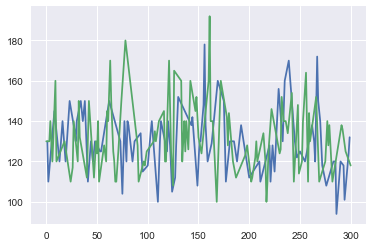

In [93]:
plt.plot(blood_pressure_men_heartdisease)
plt.plot(blood_pressure_men_no_heartdisease)

In [95]:
#Conclusion
#In men, The AGE and  the CHOLESTEROL can cause heart disease

In [97]:
#3.2.1
#Null hypotheses: In women, the age does not cause heart disease
#Alternative hypotheses: In women, the age causes heart disease

In [99]:
age_women_heartdisease = df['age'][df['sex']==0][df['class']== 1]
age_women_no_heartdisease = df['age'][df['sex']==0][df['class']== 0]

In [101]:
ttest_ind(age_women_heartdisease, age_women_no_heartdisease)

Ttest_indResult(statistic=-2.056867712395043, pvalue=0.042469631102719105)

In [103]:
#pvalue=0.042469631102719105 < 0.05
#In women, the age causes heart disease

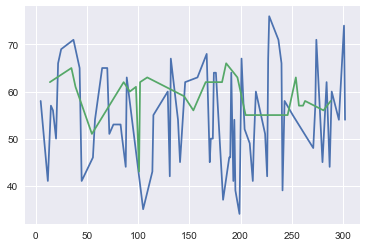

In [105]:
plt.plot(age_women_heartdisease)
plt.plot(age_women_no_heartdisease)

In [107]:
#3.2.2
#Null hypotheses: In women, the cholesterol does not cause heart disease
#Alternative hypotheses: In women, the cholesterol causes heart disease

In [109]:
cholesterol_women_heartdisease = df['cholesterol'][df['sex']==0][df['class']== 1]
cholesterol_women_no_heartdisease = df['cholesterol'][df['sex']==0][df['class']== 0]

In [111]:
ttest_ind(cholesterol_women_heartdisease, cholesterol_women_no_heartdisease)

Ttest_indResult(statistic=-1.1894474013890266, pvalue=0.23725946143684951)

In [113]:
#pvalue=0.23725946143684951 > 0.1
#In women, There is no evidence that cholesterol causes heart disease

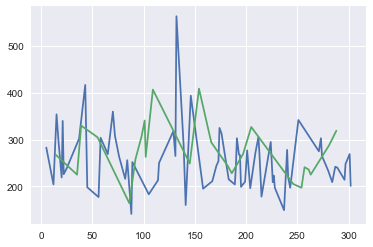

In [115]:
plt.plot(cholesterol_women_heartdisease)
plt.plot(cholesterol_women_no_heartdisease)

In [117]:
#3.2.3
#Null hypotheses: In women, the blood pressure does not cause heart disease
#Alternative hypotheses: In women, the blood pressure causes heart disease

In [119]:
blood_pressure_women_heartdisease = df['blood pressure'][df['sex']==0][df['class']== 1]
blood_pressure_women_no_heartdisease = df['blood pressure'][df['sex']==0][df['class']== 0]

In [121]:
ttest_ind(blood_pressure_women_heartdisease,blood_pressure_women_no_heartdisease)

Ttest_indResult(statistic=-4.1306918854765113, pvalue=7.837377824823497e-05)

In [124]:
#pvalue=7.837377824823497e-05 < 0.05
#In women, the blood pressure causes heart disease

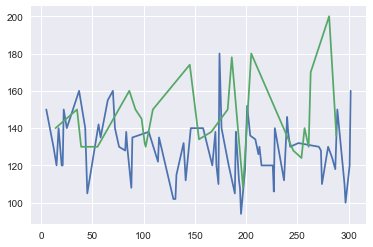

In [126]:
plt.plot(blood_pressure_women_heartdisease)
plt.plot(blood_pressure_women_no_heartdisease)

In [127]:
#Conclusion
#In women, The AGE and the BLOOD PRESSURE cause heart disease